In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl


sns.set_style("ticks")

%matplotlib inline

In [2]:
# build arrays with raw data first.
# mask, normalize and play with means later on.

def wrangle_data(in_lines):
    data = np.zeros((8,12,37))
    block = []
    block_counter = 0
    for line in in_lines:
        line = line.strip()
        line = line.split('\t')
        if line == ['']:
            block = np.array(block, dtype=float)
            
            block_data = block[:,:]
            data[:,:,block_counter] = block_data
            block = []
            block_counter +=1
        else:    
            block.append(line)
    return data

def format_figure(ax):
    '''Standard format to apply to all plots'''
    sizer = 14
    title_size = 18#sizer * 1.5
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(sizer)
    for item in [ax.title, ax.xaxis.label, ax.yaxis.label]:
        item.set_fontsize(title_size)    
    
    plt.setp(ax.spines.values(), linewidth=2)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    
    return ax

def format_legend(legend):
    for label in legend.get_texts():
        label.set_fontsize(14)

    for label in legend.get_lines():
        label.set_linewidth(2)  # the legend line width
        
    return legend
        


sns.set_style("ticks")

In [3]:
infile = open('/home/mark/data/drug_assays/2015/aug15/L1_acr_alpha_ALN_21aug.txt','rU')
in_lines = infile.readlines()
infile.close()
data = wrangle_data(in_lines)[:,:,:36]

ZZ26_data = np.zeros((8,2,36))
ZZ26_data[:,:2,:] = data[:,:2,:]

N2_data = np.zeros((8,2,36))
N2_data[:,:2,:] = data[:,2:4,:]

ZZ15_data = np.zeros((8,2,36))
ZZ15_data[:,:2,:] = data[:,4:6,:]

CB211_data = np.zeros((8,2,36))
CB211_data[:,:2,:] = data[:,6:8,:]

RB918_data = np.zeros((8,2,36))
RB918_data[:,:2,:] = data[:,10:,:]

# Fix this mean! Need mean of rows 6 and 7 over two columns each
N2_norm = N2_data[:,:,:].mean(axis=1)/N2_data[6,:,:].mean(axis=0)
ZZ26_norm = ZZ26_data[:,:,:].mean(axis=1)/ZZ26_data[6,:,:].mean(axis=0)
ZZ15_norm = ZZ15_data[:,:,:].mean(axis=1)/ZZ15_data[6,:,:].mean(axis=0)
CB211_norm = CB211_data[:,:,:].mean(axis=1)/CB211_data[6,:,:].mean(axis=0)
RB918_norm = RB918_data[:,:,:].mean(axis=1)/RB918_data[6,:,:].mean(axis=0)

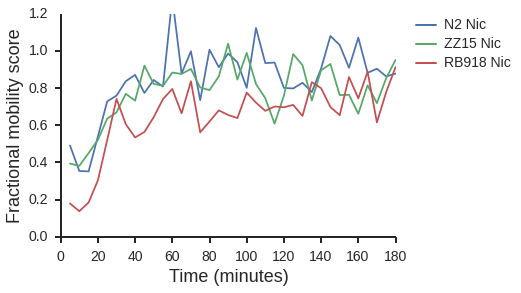

In [7]:
times = range(5,185,5)
#labels = ['N2 Nic','ZZ26 Nic',  'CB211 Nic']
labels = ['N2 Nic','ZZ15 Nic', 'RB918 Nic']
#strains = [N2_norm, ZZ26_norm,  CB211_norm]
strains = [N2_norm, ZZ15_norm, RB918_norm]
ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=100)
for i, strain in enumerate(strains):
    ax.plot(times, strain[4,:], label = labels[i])
   
#ax.axis([0,120,0,1.2])
ax = format_figure(ax)
ax.set_xlim([0, 180])
ax.set_ylim([0, 1.2])
    
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
leg = format_legend(leg)
sns.despine()   
plt.show()

#acr-16, ald tirtration, nic titration: 24th august

In [10]:
infile = open('/home/mark/data/drug_assays/2015/aug15/L1_acr16_ald_nic_24aug.txt','rU')
in_lines = infile.readlines()
infile.close()
data = wrangle_data(in_lines)[:,:,:36]

N2_nic_data = data[:,6:9,:]
RB_nic_data = data[:,9:,:]

N2_nic_norm_a = N2_nic_data[:,:,:].mean(axis=1)/N2_nic_data[7,:,:].mean(axis=0)
RB_nic_norm_a = RB_nic_data[:,:,:].mean(axis=1)/RB_nic_data[7,:,:].mean(axis=0)

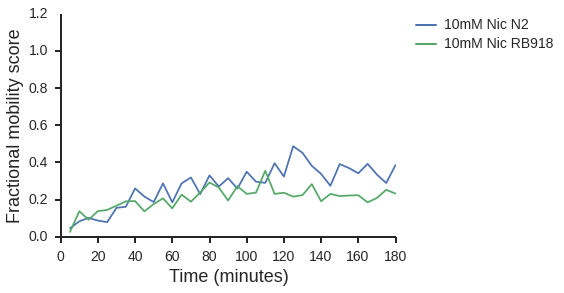

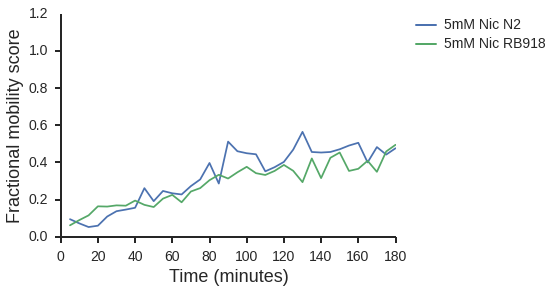

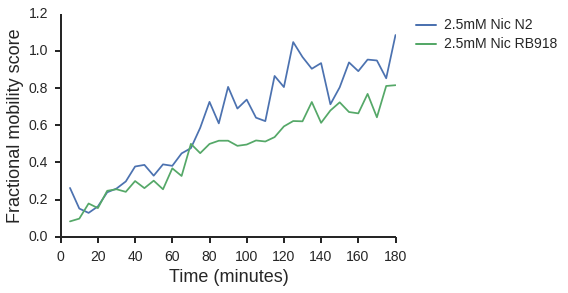

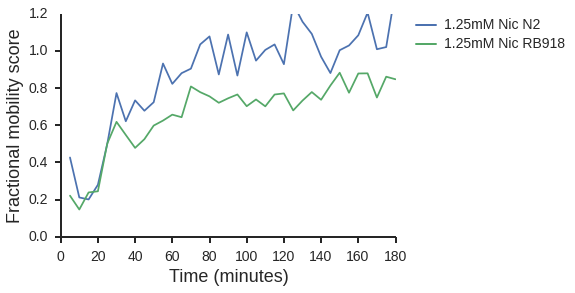

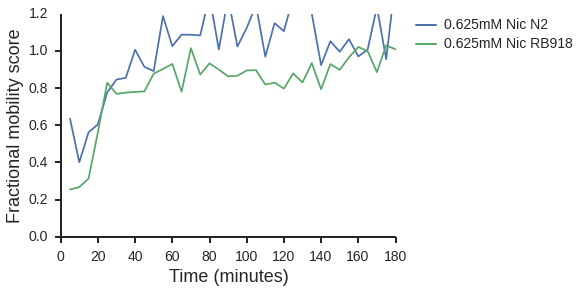

In [11]:
times = range(5,185,5)
#labels = ['ZZ26 lev', 'N2 lev', 'CB211 lev']
#labels = ['N2 lev', 'ZZ15 lev', 'RB918 lev']
labels = ['10', '5', '2.5','1.25','0.625','0.312', '0.156']

for i in [0,1,2,3,4]:
    ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=100)
    ax.plot(times, N2_nic_norm_a[i,:], label = labels[i] + 'mM Nic N2')
    ax.plot(times, RB_nic_norm_a[i,:], label = labels[i] + 'mM Nic RB918')
   

    ax = format_figure(ax)
    ax.set_xlim([0, 180])
    ax.set_ylim([0, 1.2])
    
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    leg = format_legend(leg)
    sns.despine()   
    plt.show()

#acr-16, ald tirtration, nic titration: 24th august


In [13]:
infile = open('/home/mark/data/drug_assays/2015/aug15/L1_acr16_nic_ald_25aug.txt','rU')
in_lines = infile.readlines()
infile.close()
data = wrangle_data(in_lines)[:,:,:36]

N2_nic_data = data[:,6:9,:]
RB_nic_data = data[:,9:,:]

N2_nic_norm = N2_nic_data[:,:,:].mean(axis=1)/N2_nic_data[7,:,:].mean(axis=0)
RB_nic_norm = RB_nic_data[:,:,:].mean(axis=1)/RB_nic_data[7,:,:].mean(axis=0)

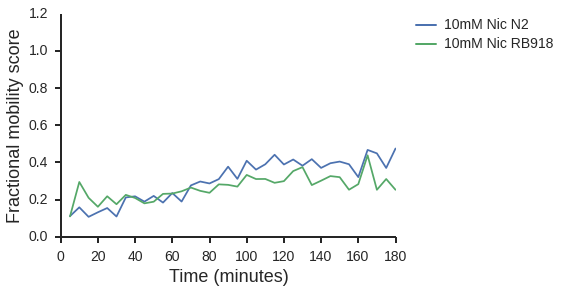

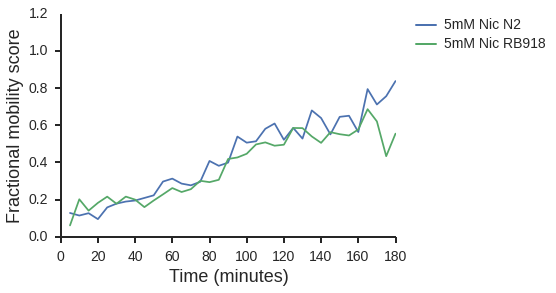

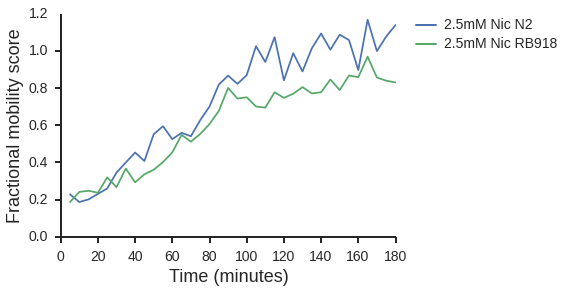

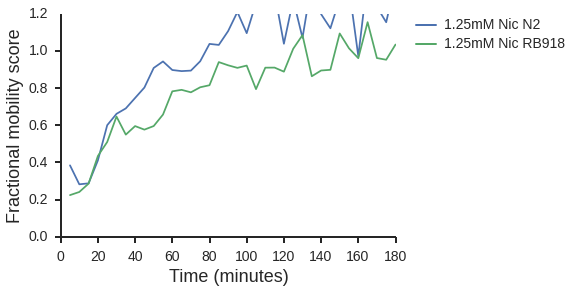

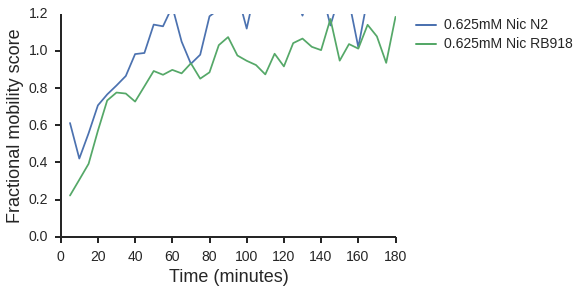

In [14]:
times = range(5,185,5)
#labels = ['ZZ26 lev', 'N2 lev', 'CB211 lev']
#labels = ['N2 lev', 'ZZ15 lev', 'RB918 lev']
labels = ['10', '5', '2.5','1.25','0.625','0.312', '0.156']

for i in [0,1,2,3,4]:
    ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=100)
    ax.plot(times, N2_nic_norm[i,:], label = labels[i] + 'mM Nic N2')
    ax.plot(times, RB_nic_norm[i,:], label = labels[i] + 'mM Nic RB918')
   

    ax = format_figure(ax)
    ax.set_xlim([0, 180])
    ax.set_ylim([0, 1.2])
    
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    leg = format_legend(leg)
    sns.despine()   
    plt.show()